# Part 2: Random networks and plotting in networkx

In [3]:
#importing package libraries
import networkx as nx
import matplotlib.pyplot  as plt
from random import choice
import numpy as np
%matplotlib inline

### Generating Erdős-Rényi Networks (NS exercise 3.1 in section 3.11)

C:\Users\laura\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


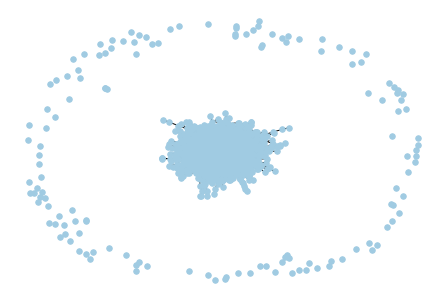

In [4]:
#Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other
#with probability p = 10–3.

N=3000   # Nr of nodes.
p=10**(-3) # Probability 
G = nx.erdos_renyi_graph(N, p)
nx.draw(G,node_size=30,node_color='#A0CBE2')
plt.show()

In [5]:
#What is the expected number of links, 〈L〉?
L = p*N
L

3.0

#In which regime is the network?





In [8]:
#Calculate the probability pc so that the network is at the critical point




In [ ]:
#Given the linking probability p = 10–3, calculate the number of nodes Ncr 
#so that the network has only one component.




In [ ]:
#For the network in (d), calculate the average degree 〈kcr〉 and 
#the average distance between two randomly chosen nodes 〈d〉.




In [24]:
#Calculate the degree distribution pk of this network 
#(approximate with a Poisson degree distribution).




### Generating Erdős-Rényi Networks

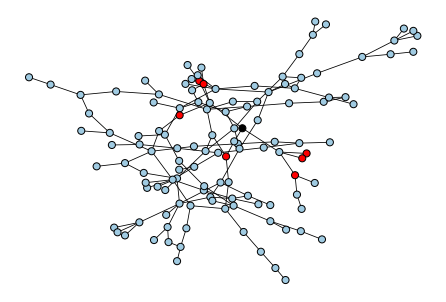

In [6]:


N = 200 #nr of nodes
k = 1.5
p = k/(N-1) #probability

ERN = nx.erdos_renyi_graph(N+1, p)#Creating network with 200 nodes
#Extract Giant connected component 
GCC = max(nx.connected_component_subgraphs(ERN), key=len)
#Choice starting node
starting_node = np.random.choice(GCC.nodes())
#Extracting nodes that have neighbor with dept  0 to 2
path_length = nx.single_source_shortest_path_length(GCC, starting_node, 2)
#Extracting only nodes that have neighbor with dept 2
neighbor_nodes = {key for (key, value) in  path_length.items() if value ==2 }
pos=nx.spring_layout(GCC) # positions for all nodes

color_map = []
for node in GCC:     
    if node == starting_node:
        color_map.append('#000000')
    elif node in neighbor_nodes:
        color_map.append('#ff0000')
    else: 
        color_map.append('#A0CBE2')      
nx.draw(GCC, pos, with_labels=False , node_color = color_map, node_size=50,  width=0.8, edgecolors='#000000')
plt.show()

# Part 3: Watts-Strogatz Networks

The shortest path length with p1 is: 62.875751503006015
The shortest path length with p2 is: 7.894829659318638
The shortest path length with p3 is: 4.759895791583166


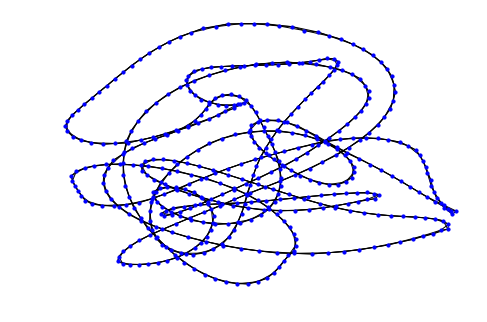

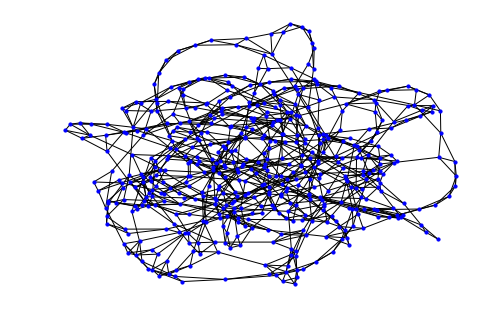

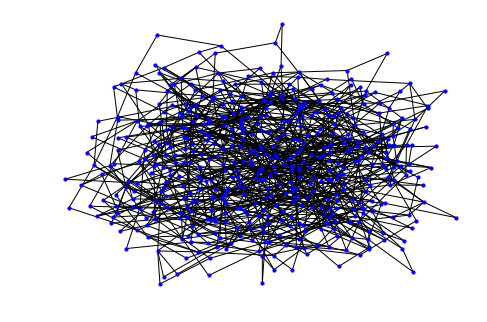

In [15]:
#Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, 
# average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. 
#Calculate the average shortest path length $\langle d \rangle$ for each one. 
# Describe what happens to the network when $p = 1$.

N, k, p1, p2, p3 = 500, 4, 0, 0.1, 1
WS1 = nx.watts_strogatz_graph(N, k,p1)
WS2 = nx.watts_strogatz_graph(N, k,p2)
WS3 = nx.watts_strogatz_graph(N, k,p3)

S1 = nx.average_shortest_path_length(WS1)
S2 = nx.average_shortest_path_length(WS2)
S3 = nx.average_shortest_path_length(WS3)
print("The shortest path length with p1 is:", S1)
print("The shortest path length with p2 is:", S2)
print("The shortest path length with p3 is:", S3)

nx.draw(WS1, with_labels=False, font_weight='bold', node_color='b', node_size=10)
plt.show()
nx.draw(WS2, with_labels=False, font_weight='bold', node_color='b', node_size=10)
plt.show()
nx.draw(WS3, with_labels=False, font_weight='bold', node_color='b',node_size=10)
plt.show()

#Describe what happens to the network when p=1.
        - The shortest path is shorter than other. Probability value "1" means all the nodes are connected 100%. The network has a huge connection with many edges and the shortest path length is so short since every nodes are connected.
        

# Part 3: Watts-Strogatz Networks

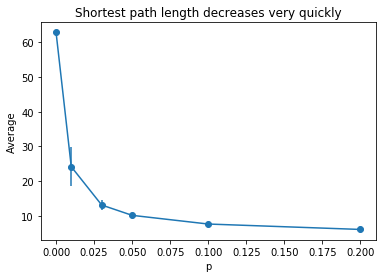

In [16]:
#Let's understand the behavior of the WS model as we increase p in more detail.. 
#Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, 
#for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average 
#of $\langle d \rangle$ as well as the standard deviation over the 50 networks, 
#to create a plot that shows how the path length decreases very quickly with only 
#a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 
#My version of the plot is below (since a picture's worth 1000 words).


p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
mean_list = []
Std_list = []

for i in p:
    avg_list = []
    #Generate 50 networks with different p values.
    for j in range(0,50): 
        WS = nx.watts_strogatz_graph(500,4, i)       
        avg_list.append(nx.average_shortest_path_length(WS)) 
    mean_list.append(np.mean(avg_list)) #calculate mean
    Std_list.append(np.array(avg_list).std()) #calculate standard deviations

fig, ax = plt.subplots()
ax.set_xlabel('p')
ax.set_ylabel('Average')
ax.set_title('Shortest path length decreases very quickly')
ax.errorbar( p , mean_list, Std_list, fmt='-o')
plt.show()
